<a href="https://colab.research.google.com/github/hadi-M/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/HADI_MODARES_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval


In [0]:
### YOUR CODE STARTS HERE
import pandas as pd
import numpy as np
from scipy import stats
from pdb import set_trace as st
from matplotlib import pyplot as plt

In [299]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-18 07:26:24--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.11’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.03s   

2020-03-18 07:26:24 (593 KB/s) - ‘house-votes-84.data.11’ saved [18171/18171]



In [300]:
df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [301]:
df1 = df.replace({"?": np.NaN, "y": 1, "n": 0})
display(df1.shape)
display(df1.head())

(435, 17)

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
def confidence_interval(data, confidence=0.95):
  data = data[~data.isna()]
  mean = data.mean()
  n = len(data)
  s = data.std()
  stderr = s / np.sqrt(n)
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [303]:
confidence_interval(df1["water-project"])

(0.5038759689922481, 0.4538408131166359, 0.5539111248678602)

2. Graphically (with a plot) represent the confidence interval

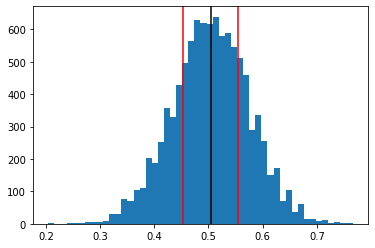

In [304]:
def confidence_interval_visualizer(data, confidence, column_name, n_times_sampling):
  mean, lower, higher = confidence_interval(data[column_name], confidence)
  ser = pd.Series(
    [
      data[column_name].sample(n=50).mean() for i in range(n_times_sampling)
    ]
  )#.hist(bins=50)

  fig, ax = plt.subplots()
  ax.hist(ser, bins=50)
  plt.axvline(x=lower, color='red')
  plt.axvline(x=mean, color='black')
  plt.axvline(x=higher, color='red')
  # print(ax)
  # ax.set_xlabel('my xdata')
  # ax.axvline(x=higher, color='red')
  # plt.set_xlabel('my xdata')

confidence_interval_visualizer(df1, 0.95, "water-project", 10000)


3. Interpret the confidence interval - what does it tell you about the data and its distribution?

In [0]:
# it means that if we sample the selected column, many times,
# the mean of thoes samples are 95% of the times in the intervals mentioned



### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [306]:
# TODO - your code!
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [307]:
# pd.crosstab(df["sex"], df["salary"])
# these are the list of pair of columns that were intresting for me:
# list_of_columns = [
#   # ["education", "capital-gain"],
#   ["race", "salary"],
#   # ["marital-status", "capital-gain"],
#   ["education-num", "marital-status"]
# ]

list_of_columns = list(
    filter(
        lambda x: len(df[x].unique())<40,
        df.columns
    )
)
list_of_columns

['workclass',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'salary']

In [0]:
def all_categorical_column_dependency_checker(df, confidence, chi2_function):
  list_of_categorical_columns = list(
      filter(
          lambda x: len(df[x].unique())<40,
          df.columns
      )
  )

  locc = list_of_categorical_columns
  
  dependency_df = pd.DataFrame(index=locc, columns=locc)
  p_value_df = dependency_df.copy()

  for ind in locc:
    for col in locc:
      # st()
      chi2, p_value, dof, expected = chi2_function(
        pd.crosstab(df[ind], df[col]).values
      )
      dependency_df.at[ind, col] = "dependent" if p_value < (1-confidence) else "independent"
      p_value_df.at[ind, col] = p_value

  return dependency_df, p_value_df

In [0]:
dependency_df, p_value_df =\
  all_categorical_column_dependency_checker(df, 0.95, stats.chi2_contingency)

In [310]:
dependency_df

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,salary
workclass,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
education,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
education-num,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
marital-status,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
occupation,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
relationship,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
race,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
sex,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
salary,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent


In [311]:
p_value_df

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,salary
workclass,0,0,0,2.15784e-206,0,9.36024e-238,3.28299e-67,3.37962e-133,1.93385e-174
education,0,0,0,1.17067e-282,0,0,5.54732e-116,1.66778e-54,0
education-num,0,0,0,1.17067e-282,0,0,5.54732e-116,1.66778e-54,0
marital-status,2.15784e-206,1.17067e-282,1.17067e-282,0,0,0,1.30873e-179,0,0
occupation,0,0,0,0,0,0,3.4035e-143,0,0
relationship,9.36024e-238,0,0,0,0,0,2.82557e-253,0,0
race,3.28299e-67,5.54732e-116,5.54732e-116,1.30873e-179,3.4035e-143,2.82557e-253,0,5.19206e-97,2.30596e-70
sex,3.37962e-133,1.66778e-54,1.66778e-54,0,0,0,5.19206e-97,0,0
salary,1.93385e-174,0,0,0,0,0,2.30596e-70,0,0


In [0]:
# now creating my own chi2_contingency_function:
def my_chi2_contingency(crosstab_df):
  
  crosstab_df = pd.DataFrame(crosstab_df)

  crosstab_df_all = crosstab_df.copy()
  expected_df = crosstab_df.copy()
  # st()
  crosstab_df_all.loc[:, "all"] = crosstab_df_all.sum(axis=1)
  # st()
  crosstab_df_all.loc["all", :] = crosstab_df_all.sum(axis=0)

  for ind in expected_df.index:
    for col in expected_df.columns:
      try:
        expected_df.at[ind, col] =\
          crosstab_df_all.iloc[ind, -1] * crosstab_df_all.iloc[-1, col] / crosstab_df_all.iloc[-1, -1]
      except TypeError:
        st()
  
  chi2 = ((crosstab_df - expected_df) ** 2 / expected_df).replace({np.inf: 0}).fillna(0).values.sum()

  crosstab_shape = crosstab_df.shape
  dof = (crosstab_shape[0] - 1) * (crosstab_shape[1] - 1)
  # st()
  p_value = 1 - stats.chi2.cdf(chi2, dof)

  return chi2, p_value, dof, expected_df




In [0]:
dependency_df, p_value_df =\
  all_categorical_column_dependency_checker(df, 0.95, my_chi2_contingency)

In [314]:
dependency_df
# since all the variables are dependent, it's not clear that my chi2 function is working
# correctly or not, but you will see that in the stretch goa, my function's out put is
# the ssame as "stats.chi2_contingency"

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,salary
workclass,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
education,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
education-num,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
marital-status,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
occupation,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
relationship,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
race,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
sex,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent
salary,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent,dependent


In [315]:
p_value_df

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,salary
workclass,0,0,0,0,0,0,0,0,0
education,0,0,0,0,0,0,0,0,0
education-num,0,0,0,0,0,0,0,0,0
marital-status,0,0,0,0,0,0,0,0,0
occupation,0,0,0,0,0,0,0,0,0
relationship,0,0,0,0,0,0,0,0,0
race,0,0,0,0,0,0,0,0,0
sex,0,0,0,0,0,0,0,0,0
salary,0,0,0,0,0,0,0,0,0


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [316]:
car_ds_url = r"https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
car_df_col_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "values"]
car_df = pd.read_csv(car_ds_url ,names=car_df_col_names)
car_df.head()

,buying,maint,doors,persons,lug_boot,safety,values
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [0]:
dependency_df, p_value_df =\
  all_categorical_column_dependency_checker(car_df, 0.95, stats.chi2_contingency)

In [318]:
dependency_df

,buying,maint,doors,persons,lug_boot,safety,values
buying,dependent,independent,independent,independent,independent,independent,dependent
maint,independent,dependent,independent,independent,independent,independent,dependent
doors,independent,independent,dependent,independent,independent,independent,independent
persons,independent,independent,independent,dependent,independent,independent,dependent
lug_boot,independent,independent,independent,independent,dependent,independent,dependent
safety,independent,independent,independent,independent,independent,dependent,dependent
values,dependent,dependent,independent,dependent,dependent,dependent,dependent


In [319]:
p_value_df

,buying,maint,doors,persons,lug_boot,safety,values
buying,0,1,1,1,1,1,5.92806e-36
maint,1,0,1,1,1,1,2.54765e-26
doors,1,1,0,1,1,1,0.320242
persons,1,1,1,0,1,1,4.03997e-77
lug_boot,1,1,1,1,0,1,1.02944e-09
safety,1,1,1,1,1,0,2.38916e-100
values,5.92806e-36,2.54765e-26,0.320242,4.03997e-77,1.02944e-09,2.38916e-100,0


In [0]:
dependency_df, p_value_df =\
  all_categorical_column_dependency_checker(car_df, 0.95, my_chi2_contingency)

In [321]:
dependency_df

,buying,maint,doors,persons,lug_boot,safety,values
buying,dependent,independent,independent,independent,independent,independent,dependent
maint,independent,dependent,independent,independent,independent,independent,dependent
doors,independent,independent,dependent,independent,independent,independent,independent
persons,independent,independent,independent,dependent,independent,independent,dependent
lug_boot,independent,independent,independent,independent,dependent,independent,dependent
safety,independent,independent,independent,independent,independent,dependent,dependent
values,dependent,dependent,independent,dependent,dependent,dependent,dependent


In [322]:
p_value_df

,buying,maint,doors,persons,lug_boot,safety,values
buying,0,1,1,1,1,1,0
maint,1,0,1,1,1,1,0
doors,1,1,0,1,1,1,0.31195
persons,1,1,1,0,1,1,0
lug_boot,1,1,1,1,0,1,5.71337e-10
safety,1,1,1,1,1,0,0
values,0,0,0.31195,0,5.71337e-10,0,0


## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)